STEPS:
1. Install/Import relevant libraries and modules
2. EDA
3. Separate independent and dependent data
4. Split your data into train and test
5. Model training(Linear Regression)
6. Model Prediction
7. Model evaluaton

STEP1: INSTALL/IMPORT RELEVANT LIBRARIES AND MODULES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

STEP2: BASIC EDA

LOAD THE DATASET

In [2]:
df = pd.read_csv('EDA_Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
525,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
526,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
527,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [3]:
df.shape

(529, 13)

In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             529 non-null    int64
 1   area              529 non-null    int64
 2   bedrooms          529 non-null    int64
 3   bathrooms         529 non-null    int64
 4   stories           529 non-null    int64
 5   mainroad          529 non-null    int64
 6   guestroom         529 non-null    int64
 7   basement          529 non-null    int64
 8   hotwaterheating   529 non-null    int64
 9   airconditioning   529 non-null    int64
 10  parking           529 non-null    int64
 11  prefarea          529 non-null    int64
 12  furnishingstatus  529 non-null    int64
dtypes: int64(13)
memory usage: 53.9 KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.290000e+02,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,4.720923e+06,4939.255198,2.962193,1.285444,1.812854,0.854442,0.181474,0.349716,0.045369,0.317580,0.682420,0.226843,0.918715
std,1.855554e+06,1799.576436,0.735007,0.499807,0.873074,0.352996,0.385776,0.477332,0.208308,0.465976,0.862351,0.419187,0.760662
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.652500e+06,6210.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,10269.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


#SAMPLE TASK TO CHECK WHETHER THE DATA IS FOLLOWING LINEARITY OR NOT

In [7]:
X = df['area']
X

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
524    3000
525    2400
526    3620
527    2910
528    3850
Name: area, Length: 529, dtype: int64

In [8]:
Y = df['price']
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
524     1820000
525     1767150
526     1750000
527     1750000
528     1750000
Name: price, Length: 529, dtype: int64

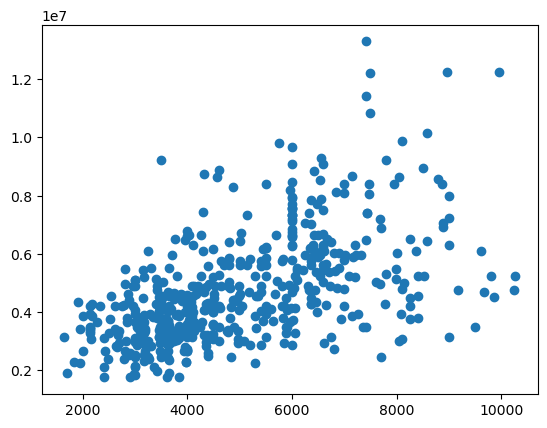

In [9]:
plt.scatter(X, Y)

MULTIVARIATE ANALYSIS:


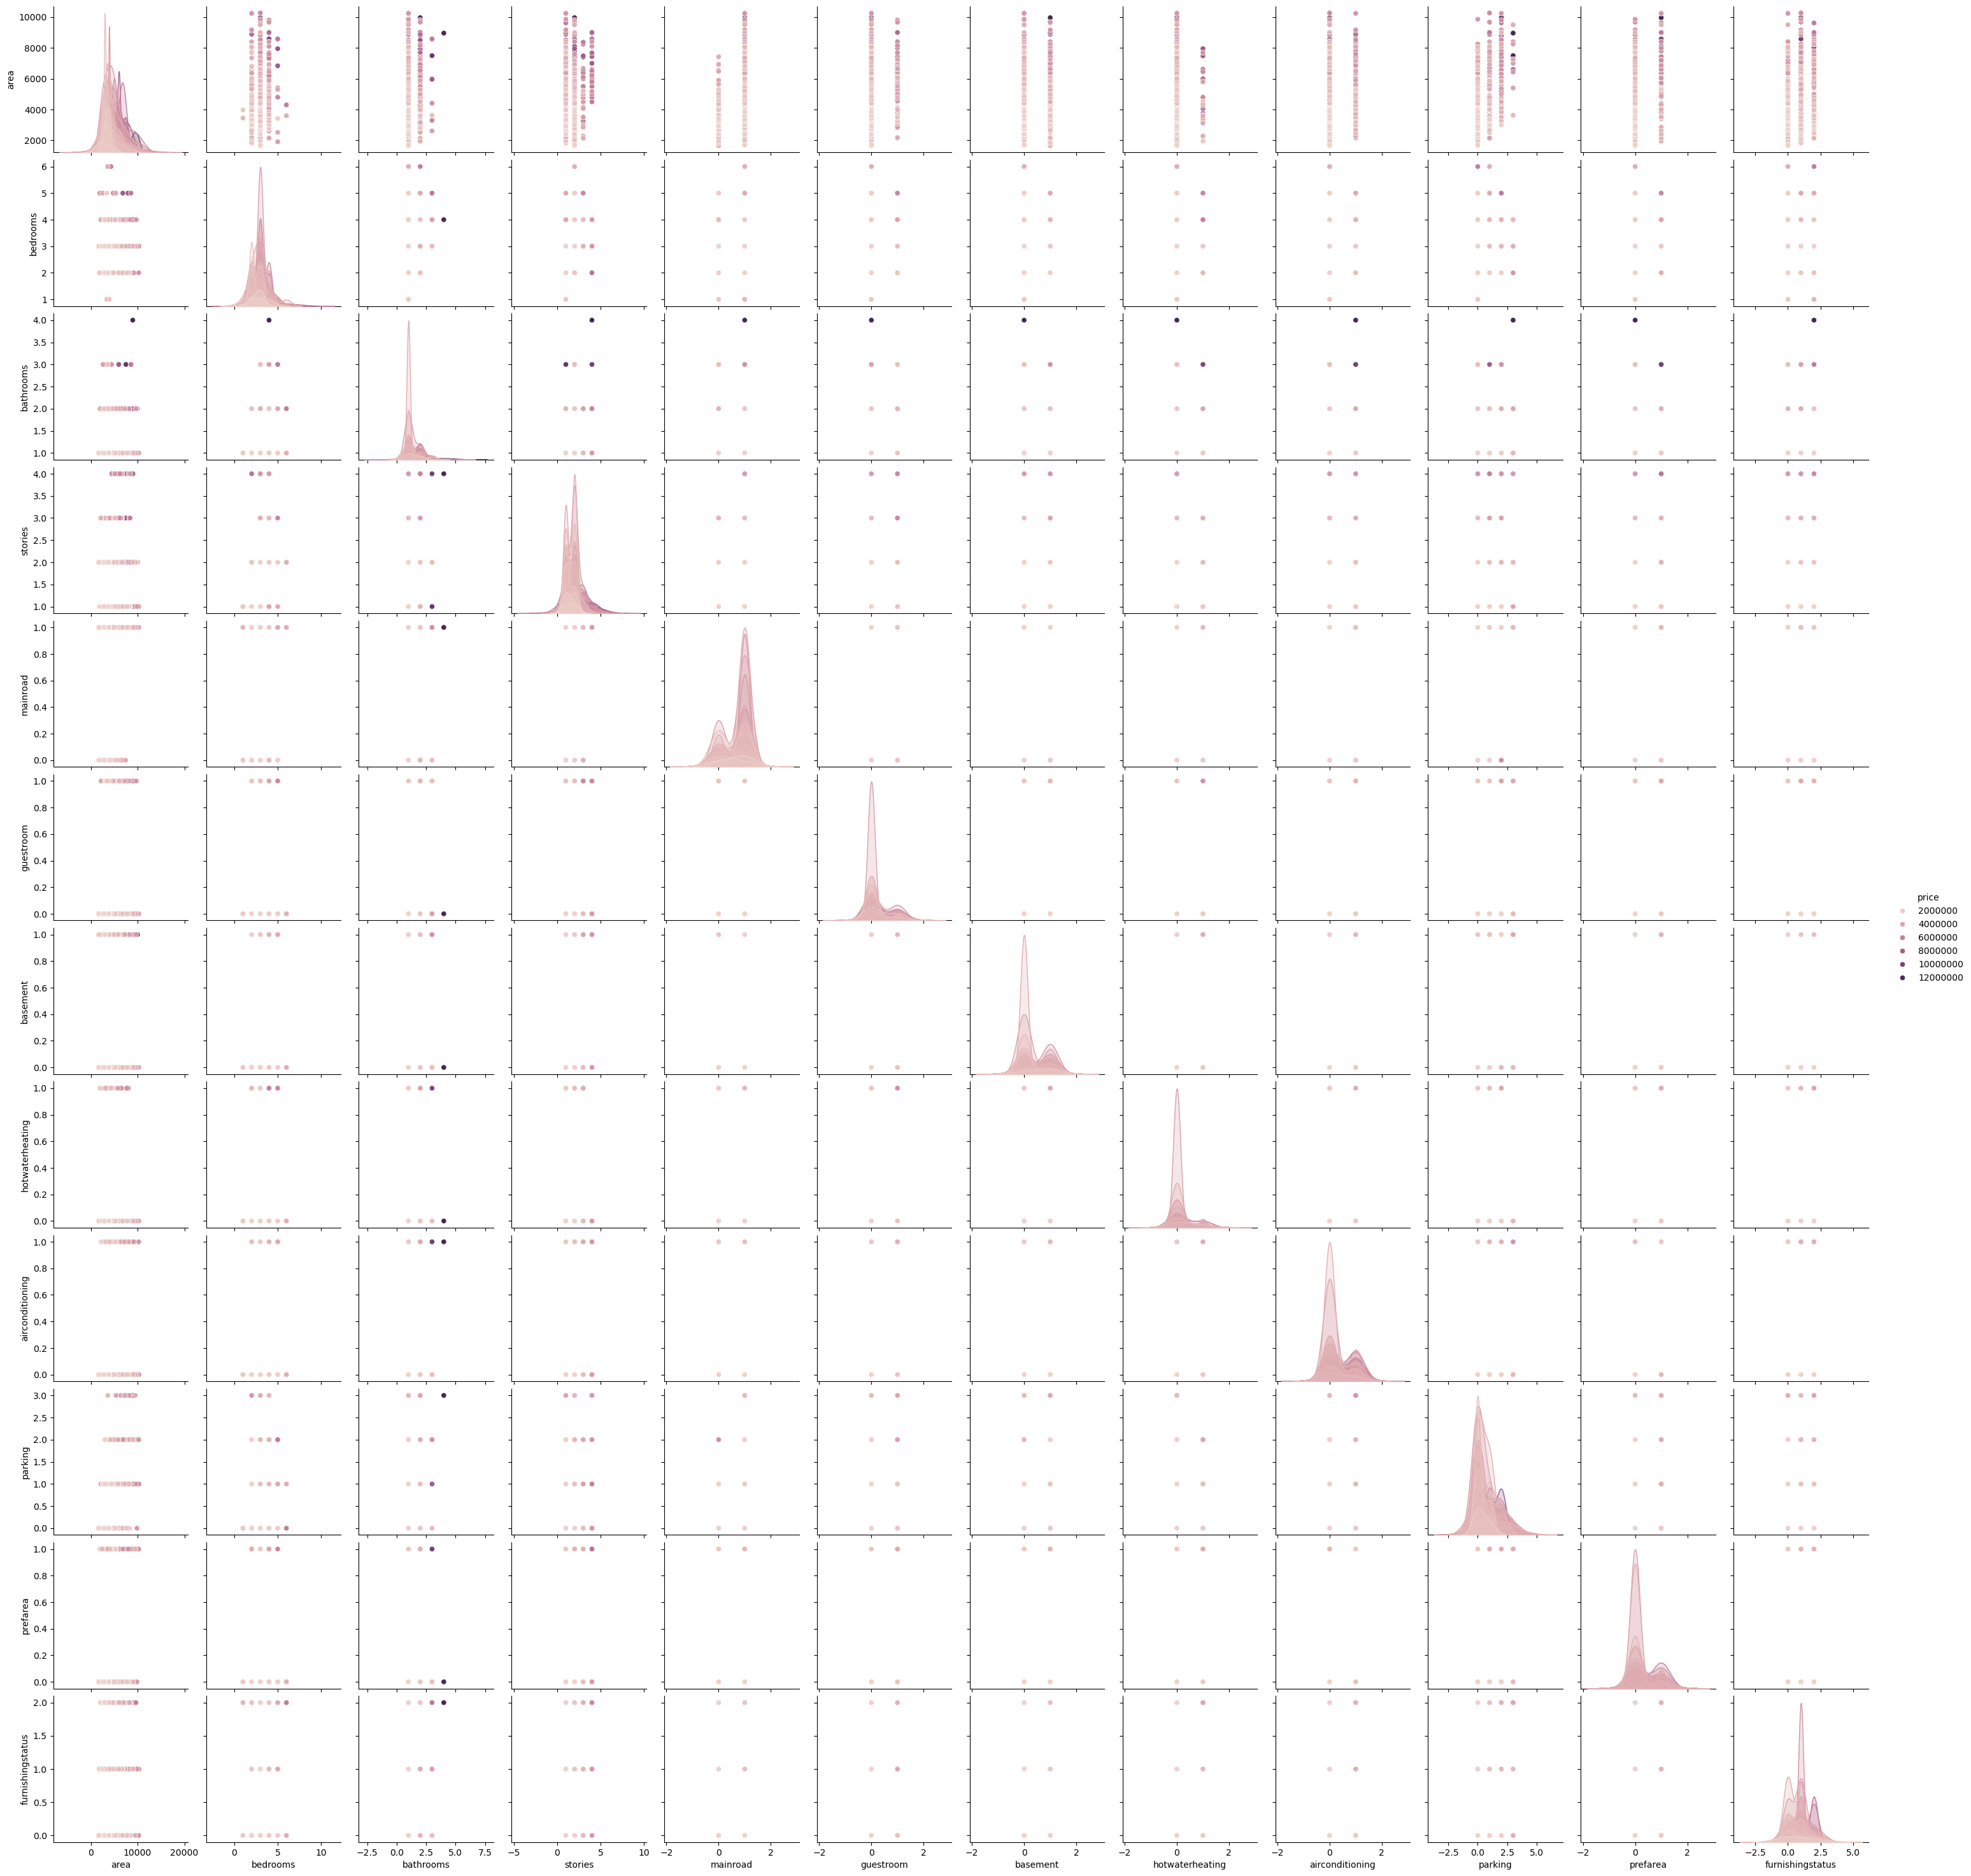

In [10]:
sns.pairplot(df, hue = 'price')


STEP3: SEPARATE INDEPENDENT AND DEPENDENT DATA:

In [16]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
525,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
526,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
527,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [21]:
#method1
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y = df['price']


In [22]:
#method2
X = df.iloc[:, 1:]
y = ['price']

In [23]:
#method3
X = df.drop(columns=['price'], axis = 1)
y = df['price']

In [24]:
X 

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
524,3000,2,1,1,1,0,1,0,0,2,0,0
525,2400,3,1,1,0,0,0,0,0,0,0,1
526,3620,2,1,1,1,0,0,0,0,0,0,0
527,2910,3,1,1,0,0,0,0,0,0,0,2


In [25]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
524     1820000
525     1767150
526     1750000
527     1750000
528     1750000
Name: price, Length: 529, dtype: int64

STEP4: SPLIT YOUR DATA INTO TRAIN AND TEST

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
137,6360,3,1,3,1,0,0,0,0,0,1,1
525,2400,3,1,1,0,0,0,0,0,0,0,1
416,6060,3,1,1,1,1,1,0,0,0,0,2
371,3850,3,1,1,1,0,0,0,0,2,0,0
69,4260,4,2,2,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6500,3,2,3,1,0,0,0,1,0,1,2
106,9620,3,1,1,1,0,1,0,0,2,1,2
270,6650,3,1,2,1,1,0,0,0,0,0,1
435,6750,2,1,1,1,0,0,0,0,0,0,1


In [27]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
140,4400,4,1,2,1,0,0,0,1,2,1,1
397,1950,3,2,2,1,0,1,0,0,0,1,0
6,8580,4,3,4,1,0,0,0,1,2,1,1
334,4820,3,1,2,1,0,0,0,0,0,0,1
322,2145,4,2,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
340,8250,3,1,1,1,0,0,0,0,2,0,2
457,8050,2,1,1,1,0,0,0,0,0,0,0
131,5800,3,2,4,1,0,0,0,1,0,0,0
338,2856,3,1,3,1,0,0,0,0,0,1,2


In [28]:
y_train

137    5600000
525    1767150
416    3290000
371    3535000
69     6650000
        ...   
71     6650000
106    6083000
270    4235000
435    3150000
102    6090000
Name: price, Length: 423, dtype: int64

In [29]:
y_test

140     5565000
397     3430000
6      10150000
334     3780000
322     3920000
         ...   
340     3773000
457     3003000
131     5740000
338     3780000
513     2275000
Name: price, Length: 106, dtype: int64

In [30]:
X_train.shape, X_test.shape

((423, 12), (106, 12))

In [31]:
y_train.shape, y_test.shape

((423,), (106,))

STEP5: MODEL TRAINING(LINEAR REGRESSION)